In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

studentVle = pd.read_csv( 'studentVle.csv' )
courses = pd.read_csv( 'courses.csv' )

studentVle.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


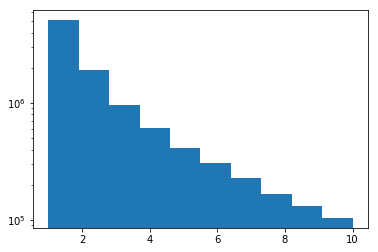

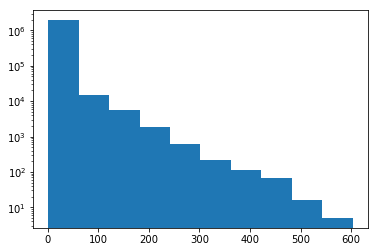

In [2]:
# collecting the clicking information and cleansing

arr = studentVle.sum_click.values
studentVle.sum_click = np.where(arr > 30, 30, arr)
plt.hist( studentVle.sum_click[ studentVle.sum_click < 11 ], log=True )
plt.show()

svle_group = studentVle.groupby( by=['id_student','id_site'] )

plt.hist( svle_group['date'].count(), log=True )
plt.show()


In [3]:
# Generate the record of student accessing the vle

sid_vle_group = studentVle.groupby( by=['id_student'] )['date']
student_access_count = sid_vle_group.count() # total number of days a student access vle
student_access_count_df = student_access_count.reset_index()
student_access_count_df.columns.values[ 1 ] = 'access_count'

In [4]:
# Generate the assessments_result table, which records students' performance with assessment information

# assessments_result will have merged data for assessments, studentAssessment, and courses tables

assessments = pd.read_csv( 'assessments.csv' )
studentAssessment = pd.read_csv( 'studentAssessment.csv' )

assessments_result = pd.merge(studentAssessment, assessments, how='left', on=['id_assessment'])
assessments_result[ 'weighted_score' ] = assessments_result[ 'weight' ] * assessments_result[ 'score' ] / 100
assessments_result = pd.merge(assessments_result, courses, how='left', on=['code_module', 'code_presentation'])

print( assessments_result.columns.values )

assessments_result.describe()

['id_assessment' 'id_student' 'date_submitted' 'is_banked' 'score'
 'code_module' 'code_presentation' 'assessment_type' 'date' 'weight'
 'weighted_score' 'module_presentation_length']


,id_assessment,id_student,date_submitted,is_banked,score,date,weight,weighted_score,module_presentation_length
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000,171047.000000,173912.000000,173739.000000,173912.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573,130.605623,12.743899,9.097475,255.233831
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107,78.025175,17.877301,12.754056,13.579401
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,234.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000,54.000000,0.000000,0.000000,240.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000,129.000000,9.000000,6.240000,262.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000,214.000000,18.000000,13.680000,268.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000,261.000000,100.000000,100.000000,269.000000


In [5]:
# visualize the relation between assessments result and students' number of accessing vle

assessments_result_vle = pd.merge(assessments_result, student_access_count_df, how='left', on=['id_student'])
assessments_result_vle.fillna(0, inplace=True)
assessments_result_vle.describe()

,id_assessment,id_student,date_submitted,is_banked,score,date,weight,weighted_score,module_presentation_length,access_count
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173912.000000,173912.000000,173912.000000,173912.000000,173912.000000,173912.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.724171,128.454046,12.743899,9.088426,255.233831,585.175307
std,8829.784254,5.523952e+05,71.484148,0.104194,18.940093,79.145538,17.877301,12.750937,13.579401,503.606550
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000,53.000000,0.000000,0.000000,240.000000,224.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000,124.000000,9.000000,6.230000,262.000000,446.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000,208.000000,18.000000,13.650000,268.000000,804.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000,261.000000,100.000000,100.000000,269.000000,6389.000000


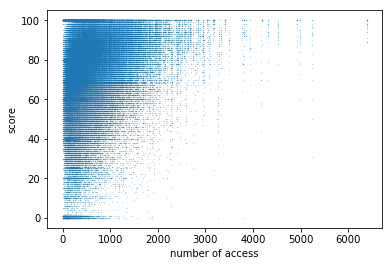

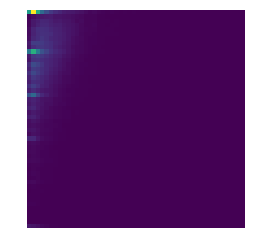

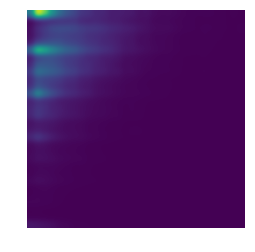

In [8]:
plt.scatter( assessments_result_vle['access_count'], assessments_result_vle['score'], s=0.01)
plt.xlabel('number of access')
plt.ylabel('score')
plt.show()

heatmap, xedges, yedges = np.histogram2d(assessments_result_vle['access_count'], assessments_result_vle['score'], bins=50)
heatmap = np.rot90(heatmap)
plt.imshow(heatmap)
plt.axis('off')
plt.show()

# ignore clicks greater than 3000, to make the majorities larger
arv_1000 = assessments_result_vle[ assessments_result_vle['access_count'] < 3000 ]

heatmap, xedges, yedges = np.histogram2d(arv_1000['access_count'], arv_1000['score'], bins=30)
heatmap = np.rot90(heatmap)
plt.imshow(heatmap, interpolation='gaussian')
plt.axis('off')
plt.show()

In [9]:
sa_group = studentAssessment.groupby( by=['id_assessment'] )['score']

sa_des = sa_group.describe()

# Since there are some assessment that hast more than half calss getting full marks, 
# they should be treated a soutliers.
# So we extract all the assessment that the Q3 score is less than 100,
# which I refer to "strict grading schema"
assess_sparse_id = set( sa_des[ sa_des['75%'] != 100 ].reset_index()[ 'id_assessment' ] )

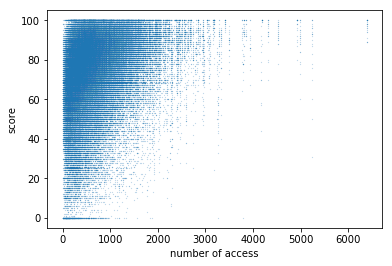

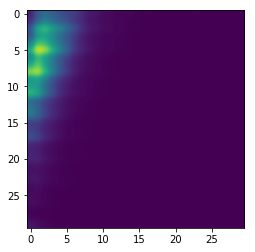

assessment score for student accessing vle from 0 to 300 times : 66.66804649707588
assessment score for student accessing vle from 300 to 600 times : 73.46558714052017
assessment score for student accessing vle from 600 to 900 times : 76.4987648132899
assessment score for student accessing vle from 900 to 1500 times : 80.23595636025998
assessment score for student accessing vle from 1500 to 3000 times : 82.54245777518928
assessment score for student accessing vle from 3000 to inf times : 88.4952380952381


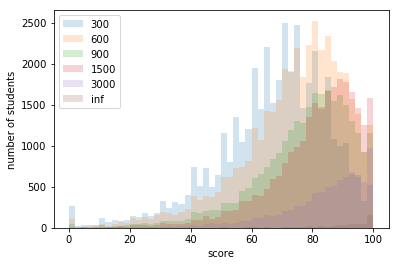

In [12]:
# only keep the result in the assessment that has strict grading schema
assessments_res_sparse = assessments_result_vle[ [ (i in assess_sparse_id) for i in assessments_result_vle['id_assessment'] ] ]
# assessments_res_sparse = assessments_res_sparse[ assessments_res_sparse['score'] > 0 ]

plt.scatter( assessments_res_sparse['access_count'], assessments_res_sparse['score'], s=0.01)
plt.xlabel('number of access')
plt.ylabel('score')
plt.show()

heatmap, xedges, yedges = np.histogram2d(assessments_res_sparse['access_count'], assessments_res_sparse['score'], bins=30)
heatmap = np.rot90(heatmap)
plt.imshow(heatmap, interpolation='gaussian')
plt.show()

# visualize the score distribution for different clicking numbers
ass_cnt = assessments_res_sparse['access_count']

boundry = [ 0, 300, 600, 900, 1500, 3000, np.inf ]

for i, j in zip(boundry, boundry[1:]):
    test_res = assessments_res_sparse[ np.logical_and( i <= ass_cnt, ass_cnt < j ) ]['score']

    #lable j : the distribution represent the student that clicks i to j times
    plt.hist( test_res, alpha=0.2, bins=50, label=str(j) ) 
    print( 'assessment score for student accessing vle from {} to {} times : {}'.format( i, j, test_res.mean() ) )

plt.legend(loc='upper left')
plt.xlabel('score')
plt.ylabel('number of students')
plt.show()

In [13]:
# Machine Learning
# Use machine learning and regression to predict the assessment results from number of clicks 

assessment_df = assessments_res_sparse.sample(frac=1)

train_len = int( len( assessment_df ) * 0.7 )

train_x = assessment_df['access_count'][:train_len]
train_y = assessment_df['score'][:train_len]

test_x = assessment_df['access_count'][train_len:]
test_y = assessment_df['score'][train_len:]

Ridge_clf = Ridge()
# GaussianNB_clf = GaussianNB()
# SVR_clf = SVR()

Ridge_clf.fit( train_x.values.reshape(-1, 1), train_y.values )
# GaussianNB_clf.fit( train_x.values.reshape(-1, 1), train_y.values )
# SVR_clf.fit( train_x.values.reshape(-1, 1), train_y.values )

Ridge_predict_res = Ridge_clf.predict( test_x.values.reshape(-1, 1) )
# GaussianNB_predict_res = GaussianNB_clf.predict( test_x.values.reshape(-1, 1) )
# SVR_predict_res = SVR_clf.predict( test_x.values.reshape(-1, 1) )

print( 'Ridge error : {}'.format( np.sqrt( mean_squared_error( Ridge_predict_res, test_y ) ) ) )
# print( 'GaussianNB error : {}'.format( np.sqrt( mean_squared_error( GaussianNB_predict_res, test_y ) ) ) )
# print( 'SVR error : {}'.format( np.sqrt( mean_squared_error( SVR_predict_res, test_y ) ) ) )

mean_pre = np.zeros( test_y.shape )
mean_pre.fill( np.mean(train_y) )

print( 'mean :' )
print( np.mean(train_y) )
print( 'dummy prediction using mean value' )
print( np.sqrt( mean_squared_error( mean_pre, test_y ) ) )


Ridge error : 16.95013768944931
mean :
73.88049652645836
dummy prediction using mean value
17.659899744


['id_assessment' 'id_student' 'date_submitted' 'is_banked' 'score'
 'code_module' 'code_presentation' 'assessment_type' 'date' 'weight'
 'weighted_score' 'module_presentation_length']


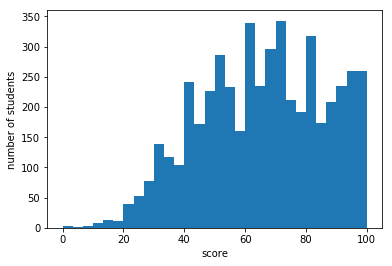

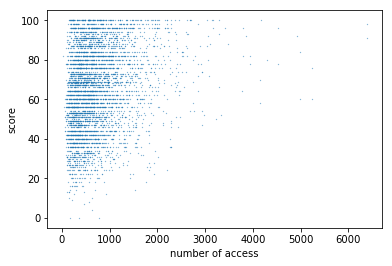

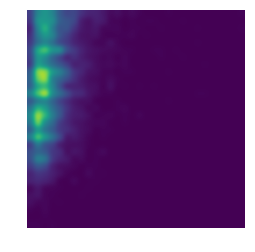

assessment score for student accessing vle from 0 to 500 times : 60.80660835762877
assessment score for student accessing vle from 500 to 1000 times : 67.01259583789704
assessment score for student accessing vle from 1000 to 2000 times : 71.37472766884531
assessment score for student accessing vle from 2000 to 3000 times : 75.8360655737705
assessment score for student accessing vle from 3000 to inf times : 82.77142857142857


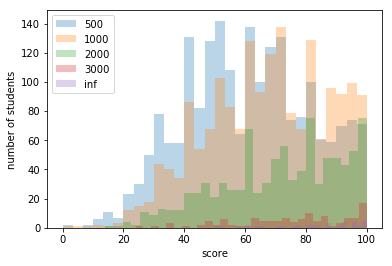

In [16]:
# only analysis the exam result instead of all assessment

exam_result = assessments_result[ assessments_result['assessment_type'] == 'Exam' ]

print( exam_result.columns.values )

exam_result_vle = pd.merge(exam_result, student_access_count_df, how='left', on=['id_student'])
exam_result_vle.fillna(0, inplace=True)
exam_result_vle.describe()

# visualize the relationship between access_count and exam result

plt.hist( exam_result_vle['score'], bins=30 )
plt.xlabel('score')
plt.ylabel('number of students')
plt.show()

plt.scatter( exam_result_vle['access_count'], exam_result_vle['score'], s=0.05)
plt.xlabel('number of access')
plt.ylabel('score')
plt.show()

heatmap, xedges, yedges = np.histogram2d(exam_result_vle['access_count'], exam_result_vle['score'], bins=30)
heatmap = np.rot90(heatmap)
plt.imshow(heatmap, interpolation='gaussian')
plt.axis('off')
plt.show()

# visualize the exam score distribution for different clicking numbers
# We can see that the mean for exam is much lower than the course work assessment,
# and the deviation is much sparse than course work

ass_cnt = exam_result_vle['access_count']

boundry = [ 0, 500, 1000, 2000, 3000, np.inf ]

for i, j in zip(boundry, boundry[1:]):
    test_res = exam_result_vle[ np.logical_and( i <= ass_cnt, ass_cnt < j ) ]['score']

    #lable j : the distribution represent the student that clicks i to j times
    plt.hist( test_res, alpha=0.3, bins=30, label=str(j) ) 
    print( 'assessment score for student accessing vle from {} to {} times : {}'.format( i, j, test_res.mean() ) )

plt.legend(loc='upper left')
plt.xlabel('score')
plt.ylabel('number of students')
plt.show()

In [17]:
# explore the clicking patterm related to exam results

### Function defenitions

def gen_cnt_res_scatter( curr_exam_df, look_back_from, look_back_to=0 ):

    '''
    no need to copy curr_exam_df, since we only merg eit and generate new tables
    '''
    
    stu_vle_exam = pd.merge( studentVle, curr_exam_df, on=['id_student'], how='inner', suffixes=('_vle', '_y') )
    stu_vle_exam['access_date'] = stu_vle_exam[ 'date_vle' ]
    stu_vle_exam['date_to_submit'] = stu_vle_exam[ 'date_submitted' ] - stu_vle_exam[ 'access_date' ]

    date_to_submit = stu_vle_exam['date_to_submit']

    close_access = stu_vle_exam[ np.logical_and( date_to_submit < look_back_from, date_to_submit > look_back_to ) ]
    close_access = close_access.groupby( by=['id_student', 'id_assessment'] )['sum_click'].count().reset_index()

    exam_res_close_vle = pd.merge( curr_exam_df, close_access, on=['id_student', 'id_assessment'], how='left' )
    exam_res_close_vle.fillna(0, inplace=True)

    return exam_res_close_vle[ ['id_student', 'id_assessment', 'sum_click', 'score'] ]

def get_boundary_from_arr( arr, hist_n ):
    mx = int( ( max( arr ) - min( arr ) ) / 2 )
    hist_n = ( mx - min( ass_cnt ) ) / ( hist_n-2 )
    boundry = [0] + list( range( int( min( ass_cnt ) ), mx+1, int(hist_n) ) ) + [np.inf]
    return boundry

def cnt_lookback_plot( assessment_result_df, look_back, hist_n=5 ):
    '''
    for the curr_exam_df, join with the access count within look_back days to the exam submission date.
    then generate histogram for the boundry
    '''
    exam_res_close_vle = gen_cnt_res_scatter( assessment_result_df, look_back )
    
    # plt.scatter( exam_res_close_vle['sum_click'], exam_res_close_vle['score'], s=3 )
    # plt.show()

    # visualize the score distribution for different clicking numbers
    ass_cnt = exam_res_close_vle['sum_click']
    boundry = get_boundary_from_arr( ass_cnt, hist_n )
    
    for i, j in zip(boundry, boundry[1:]):
        test_res = exam_res_close_vle[ np.logical_and( i <= ass_cnt, ass_cnt < j ) ]['score']

        
        weights = np.ones_like(test_res)/float(len(test_res))

        #lable j : the distribution represent the student that clicks i to j times
        plt.hist( test_res, alpha=0.3, bins=30, label=str(j), weights=weights ) 
        print( 'assessment score for student accessing vle from {} to {} times : {}'.format( i, j, test_res.mean() ) )

    plt.xlabel('score')
    plt.ylabel('number of students')
    plt.legend(loc='upper left')
    plt.show()

assessment score for student accessing vle from 0 to 13 times : 56.05882352941177
assessment score for student accessing vle from 13 to 353 times : 63.43983509404793
assessment score for student accessing vle from 353 to 693 times : 72.67937219730942
assessment score for student accessing vle from 693 to 1033 times : 78.07936507936508
assessment score for student accessing vle from 1033 to inf times : 77.79069767441861


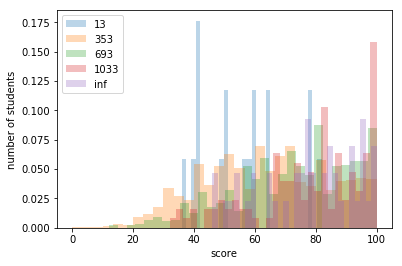

assessment score for student accessing vle from 0 to 13 times : 54.140724946695094
assessment score for student accessing vle from 13 to 144 times : 64.59400998336106
assessment score for student accessing vle from 144 to 275 times : 74.76170212765958
assessment score for student accessing vle from 275 to 406 times : 79.33812949640287
assessment score for student accessing vle from 406 to inf times : 78.075


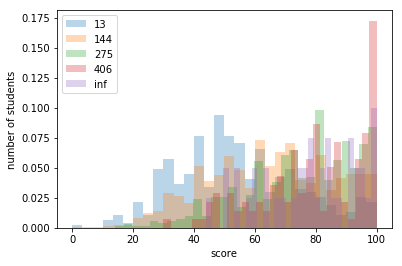

assessment score for student accessing vle from 0 to 13 times : 62.30532445923461
assessment score for student accessing vle from 13 to 47 times : 67.12382367508668
assessment score for student accessing vle from 47 to 81 times : 73.4469696969697
assessment score for student accessing vle from 81 to 115 times : 76.80188679245283
assessment score for student accessing vle from 115 to inf times : 77.79411764705883


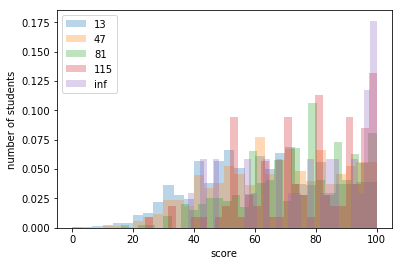

assessment score for student accessing vle from 0 to 13 times : 64.93699409319623
assessment score for student accessing vle from 13 to 22 times : 72.06474820143885
assessment score for student accessing vle from 22 to 31 times : 74.58730158730158
assessment score for student accessing vle from 31 to 40 times : 75.11538461538461
assessment score for student accessing vle from 40 to inf times : 79.19047619047619


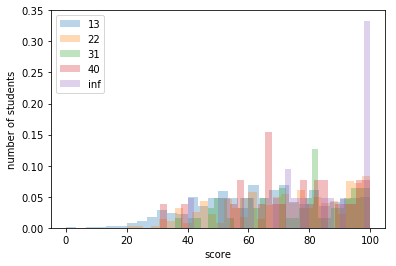

In [18]:
hist_n = 5
look_back = 100
cnt_lookback_plot( exam_result, look_back, hist_n )

look_back = 30
cnt_lookback_plot( exam_result, look_back, hist_n )

look_back = 7
cnt_lookback_plot( exam_result, look_back, hist_n )

look_back = 3
cnt_lookback_plot( exam_result, look_back, hist_n )

In [19]:
def calculate_mean_improve_factor(data_df, base_col, score_col, n=10, if_plot=False):
    '''
    calculating the improve factor
    
    sort the dataframe be base column and split into n groups,
    for each group, calculate the mean of clicks and mean of score, then do the linear regrassion.
    
    We only do linear regression on the n mean values, instead of riginal data points,
    mainly because in most student clicks only a small number
    therefore it may reduce the significant of students with more clicks
    '''
    
    sorted_df = data_df.sort_values( by=base_col )
    df_len = int( len( sorted_df )/n )

    score_mean_arr = []
    base_mean_arr = []
    
    for i in range(n):
        score_mean_arr.append( sorted_df[score_col][i*df_len:(i+1)*df_len].mean() )
        base_mean_arr.append( sorted_df[base_col][i*df_len:(i+1)*df_len].mean() )

    base_mean_arr = np.array( base_mean_arr ).reshape( -1, 1 )

    line_reg = LinearRegression()
    line_reg.fit( base_mean_arr, score_mean_arr )

    if if_plot:
        pred = line_reg.predict( base_mean_arr )

        plt.plot( base_mean_arr, pred )
        plt.scatter( base_mean_arr, score_mean_arr )

    return line_reg.coef_[0]


improve factor for day 200: 0.16894001920295892
improve factor for day 190: 0.14382120994275005
improve factor for day 180: 0.11150003607280934
improve factor for day 170: 0.18156445394612933
improve factor for day 160: 0.13247377746173986
improve factor for day 150: 0.23280143227173716
improve factor for day 140: 0.2125954027366358
improve factor for day 130: 0.2456320201918819
improve factor for day 120: 0.10755666025332777
improve factor for day 110: 0.17952904474209394
improve factor for day 100: 0.18916857571073264
improve factor for day 90: 0.13859824341229832
improve factor for day 80: 0.1794037715075237
improve factor for day 70: 0.2629769838918247
improve factor for day 60: 0.2777123482187378
improve factor for day 50: 0.27633252155799454
improve factor for day 40: 0.23348526336847517
improve factor for day 30: 0.2594298117154451
improve factor for day 20: 0.2446020748501849
improve factor for day 10: 0.19961188379508013
improve factor for day 7: 0.1912758173073719


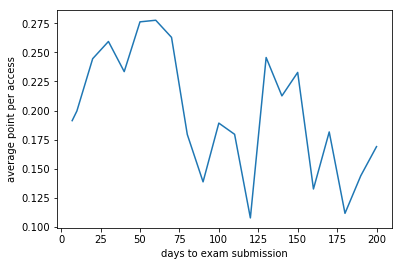

In [20]:
look_back_arr = [ 200, 190, 180, 170, 160, 150, 140, 130, 120, 110, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 7 ]

im_fac_arr = []

for lookb in look_back_arr:
    look_back = lookb
    look_back_to = 0 if look_back - 7 < 0 else look_back - 7
    exam_res_close_vle = gen_cnt_res_scatter( exam_result, look_back, look_back_to )
    im_fac = calculate_mean_improve_factor( exam_res_close_vle, 'sum_click', 'score' )
    print( 'improve factor for day {}: {}'.format(look_back, im_fac) )
    im_fac_arr.append( im_fac )

# We can see the bottleneck is around 75 points. no matter how much student access the vle,
# the mean score stay around 75

# the graph essentially showed that during that week, how much grade will one access effect on average.
# turned out that the studied should be started 1 to 2 month before the exam,
# which will be most effective

# also for those who started studies four months before the exam,
# it's likely that they get good grade because they had long enough preparation

plt.plot( look_back_arr, im_fac_arr )
plt.xlabel('days to exam submission')
plt.ylabel('average point per access')
plt.show()